<a href="https://colab.research.google.com/github/Hana0405/DA/blob/main/Online_Retailer_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Load sales data
url = '/content/sample_data/Superstore.xls'
data = pd.read_excel(url)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         65535 non-null  int64         
 1   Order ID       65535 non-null  object        
 2   Order Date     65535 non-null  datetime64[ns]
 3   Ship Date      65535 non-null  datetime64[ns]
 4   Ship Mode      65535 non-null  object        
 5   Customer ID    65535 non-null  object        
 6   Customer Name  65535 non-null  object        
 7   Segment        65535 non-null  object        
 8   Country        65535 non-null  object        
 9   City           65535 non-null  object        
 10  State          65535 non-null  object        
 11  Postal Code    65478 non-null  float64       
 12  Region         65535 non-null  object        
 13  Product ID     65535 non-null  object        
 14  Category       65535 non-null  object        
 15  Sub-Category   6553

In [125]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"42,420.00",South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"42,420.00",South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,"90,036.00",West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,"33,311.00",South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,"33,311.00",South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [126]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,"65,535.00",65535,65535,"65,478.00","65,535.00","65,535.00","65,535.00","65,535.00"
mean,"4,809.50",2016-04-29 12:40:21.203937024,2016-05-03 11:38:31.284046848,"55,243.26",229.51,3.79,0.16,28.39
min,1.00,2014-01-03 00:00:00,2014-01-07 00:00:00,"1,040.00",0.44,1.00,0.00,"-6,599.98"
25%,"2,341.00",2015-05-22 00:00:00,2015-05-26 00:00:00,"23,223.00",17.22,2.00,0.00,1.73
50%,"4,682.00",2016-06-24 00:00:00,2016-06-28 00:00:00,"57,103.00",54.22,3.00,0.20,8.67
75%,"7,264.00",2017-05-14 00:00:00,2017-05-18 00:00:00,"90,008.00",209.94,5.00,0.20,29.34
max,"9,994.00",2017-12-30 00:00:00,2018-01-05 00:00:00,"99,301.00","22,638.48",14.00,0.80,"8,399.98"
std,"2,866.39",NaN,NaN,"32,020.89",622.37,2.23,0.21,231.95


In [127]:
# Display number of unique values for each attribute
unique_counts = data.nunique()
print("Number of unique values for each attribute:")
print(unique_counts)
# Display unique values for each attribute (or a sample if there are too many unique values)
print("\nUnique values for each attribute:")

for column in data.columns:
    unique_values = data[column].unique()
    num_unique_values = len(unique_values)

    if num_unique_values > 20:  # If there are more than 20 unique values, display only the first 20
        print(f"\n{column} (showing 20 of {num_unique_values} unique values):")
        print(unique_values[:20])
    else:
        print(f"\n{column} ({num_unique_values} unique values):")
        print(unique_values)

Number of unique values for each attribute:
Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1853
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

Unique values for each attribute:

Row ID (showing 20 of 9994 unique values):
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Order ID (showing 20 of 5009 unique values):
['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' 'CA-2014-115812'
 'CA-2017-114412' 'CA-2016-161389' 'US-2015-118983' 'CA-2014-105893'
 'CA-2014-167164' 'CA-2014-143336' 'CA-2016-137330' 'US-2017-156909'
 'CA-2015-106320' 'CA-2016-121755' 'US-2015-150630' 'CA-2017-107727'
 'CA-2016-117590' 

# Preprocessing

In [128]:
# Data cleaning: Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         65535 non-null  int64         
 1   Order ID       65535 non-null  object        
 2   Order Date     65535 non-null  datetime64[ns]
 3   Ship Date      65535 non-null  datetime64[ns]
 4   Ship Mode      65535 non-null  object        
 5   Customer ID    65535 non-null  object        
 6   Customer Name  65535 non-null  object        
 7   Segment        65535 non-null  object        
 8   Country        65535 non-null  object        
 9   City           65535 non-null  object        
 10  State          65535 non-null  object        
 11  Postal Code    65478 non-null  float64       
 12  Region         65535 non-null  object        
 13  Product ID     65535 non-null  object        
 14  Category       65535 non-null  object        
 15  Sub-Category   6553

# Descriptive Analytics: Sales

In [130]:
#Total sales
total_sales = data['Sales'].sum()
print("Total Sales:", total_sales)
#Total profit
total_profit = data['Profit'].sum()
print("Total Profit:", total_profit)

Total Sales: 15040854.629499998
Total Profit: 1860500.6738999998


      Month      Sales
0   2014-01  93,785.32
1   2014-02  28,553.71
2   2014-03 368,924.04
3   2014-04 186,220.16
4   2014-05 153,527.01
5   2014-06 234,449.83
6   2014-07 226,888.85
7   2014-08 184,358.88
8   2014-09 547,768.94
9   2014-10 206,173.99
10  2014-11 523,438.17
11  2014-12 455,536.45
12  2015-01 118,309.65
13  2015-02  77,753.68
14  2015-03 255,189.90
15  2015-04 222,769.43
16  2015-05 191,343.50
17  2015-06 157,651.19
18  2015-07 196,886.08
19  2015-08 246,348.30
20  2015-09 423,594.13
21  2015-10 208,698.90
22  2015-11 487,937.61
23  2015-12 490,155.00
24  2016-01 117,848.54
25  2016-02 144,686.23
26  2016-03 337,926.87
27  2016-04 261,008.98
28  2016-05 377,270.60
29  2016-06 259,974.07
30  2016-07 259,052.40
31  2016-08 202,542.69
32  2016-09 476,823.69
33  2016-10 371,519.20
34  2016-11 514,693.69
35  2016-12 627,124.27
36  2017-01 281,579.05
37  2017-02 130,495.96
38  2017-03 378,172.32
39  2017-04 245,359.03
40  2017-05 290,847.93
41  2017-06 342,490.30
42  2017-07

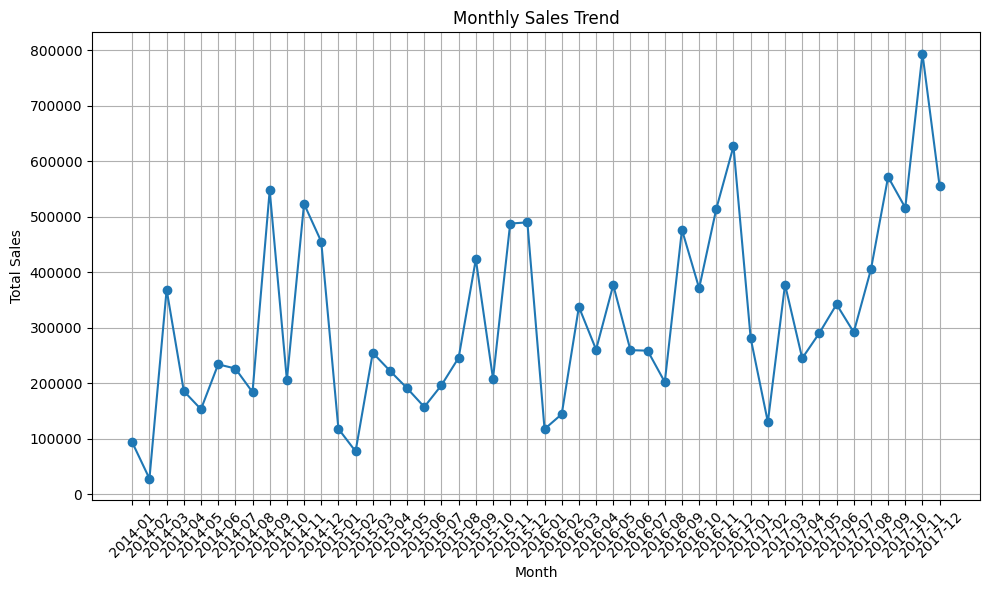

In [131]:
# Descriptive Analytics: Total sales per month
data['Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
print(monthly_sales)

# Visualization: Monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# Adding annotations for sales numbers
# for i, txt in enumerate(monthly_sales['Sales']):
#     plt.annotate(txt, (monthly_sales['Month'].astype(str)[i], monthly_sales['Sales'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# plt.tight_layout()
# plt.show()


Total Sales by Region (sorted):
    Region        Sales
3     West 4,740,244.44
1     East 4,428,019.21
0  Central 3,289,180.16
2    South 2,583,410.82

Total Sales by State (sorted):
                   State        Sales
3             California 2,985,036.56
30              New York 2,027,448.58
41                 Texas 1,122,465.58
45            Washington   898,291.54
36          Pennsylvania   760,126.51
8                Florida   598,803.71
11              Illinois   526,920.94
33                  Ohio   508,777.06
20              Michigan   499,677.40
44              Virginia   455,612.25
31        North Carolina   367,141.85
12               Indiana   341,362.94
9                Georgia   329,466.30
15              Kentucky   238,609.12
28            New Jersey   238,071.09
1                Arizona   236,884.05
4               Colorado   217,494.29
47             Wisconsin   212,256.65
21             Minnesota   200,929.13
40             Tennessee   195,864.89
6               D

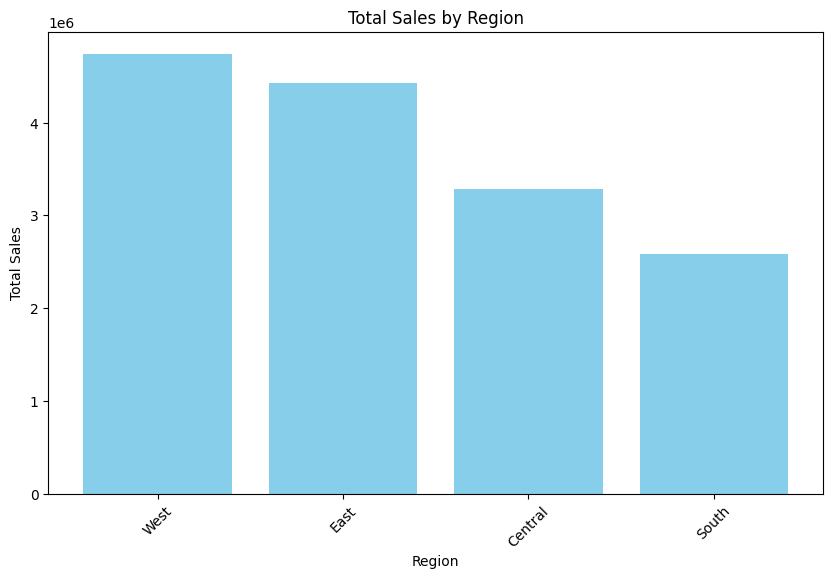

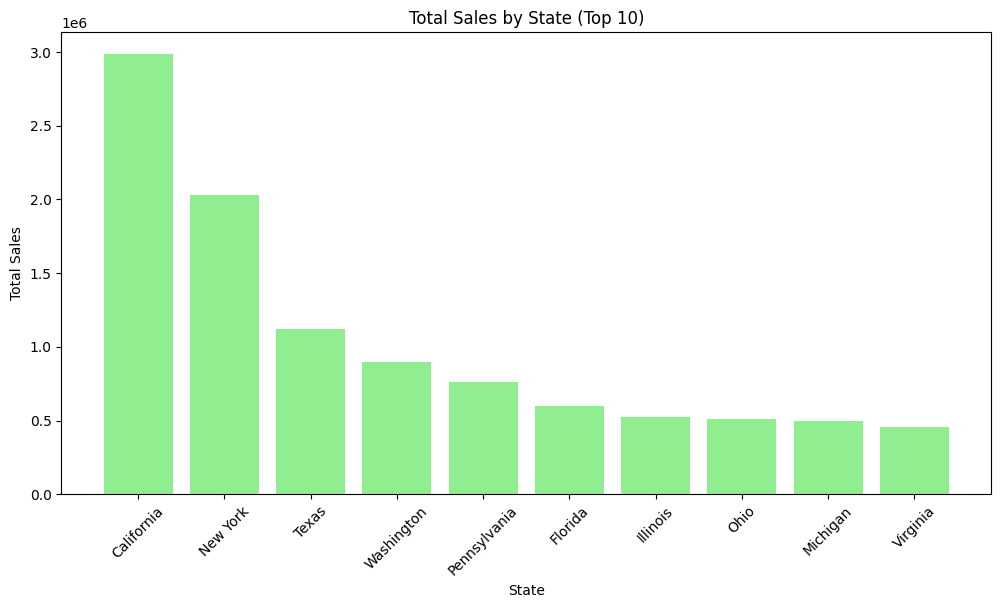

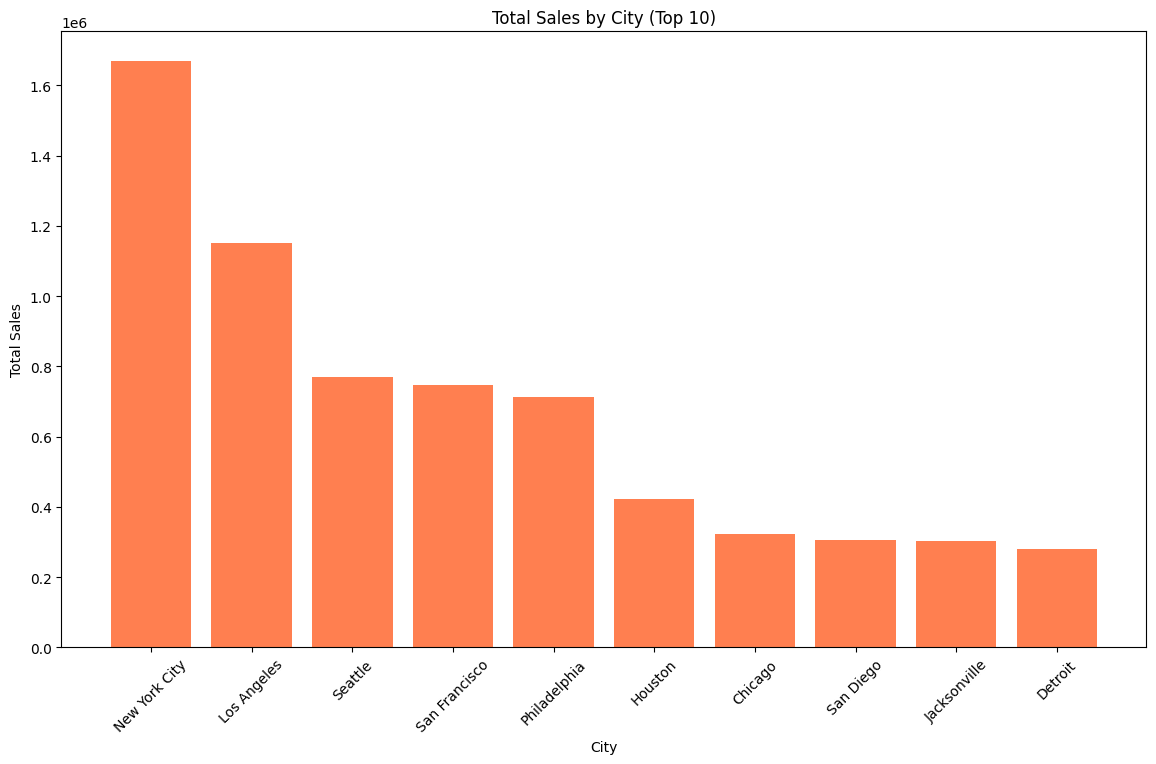

In [132]:
#TOTAL SALES BY REGION, STATE, CITY
# Group the data by region, state, and city and sum the sales
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()
sales_by_state = data.groupby('State')['Sales'].sum().reset_index()
sales_by_city = data.groupby('City')['Sales'].sum().reset_index()

#  Sort by sales to see the top performers
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)
sales_by_state = sales_by_state.sort_values(by='Sales', ascending=False)
sales_by_city = sales_by_city.sort_values(by='Sales', ascending=False)

print("\nTotal Sales by Region (sorted):")
print(sales_by_region)

print("\nTotal Sales by State (sorted):")
print(sales_by_state)

print("\nTotal Sales by City (sorted):")
print(sales_by_city)

# Plotting total sales by region
plt.figure(figsize=(10, 6))
plt.bar(sales_by_region['Region'], sales_by_region['Sales'], color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plotting total sales by state (top 10 states for better visibility)
plt.figure(figsize=(12, 6))
top_states = sales_by_state.head(10)
plt.bar(top_states['State'], top_states['Sales'], color='lightgreen')
plt.title('Total Sales by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plotting total sales by city (top 10 cities for better visibility)
plt.figure(figsize=(14, 8))
top_cities = sales_by_city.head(10)
plt.bar(top_cities['City'], top_cities['Sales'], color='coral')
plt.title('Total Sales by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

       Segment        Sales
0     Consumer 7,604,933.02
1    Corporate 4,602,477.43
2  Home Office 2,833,444.18


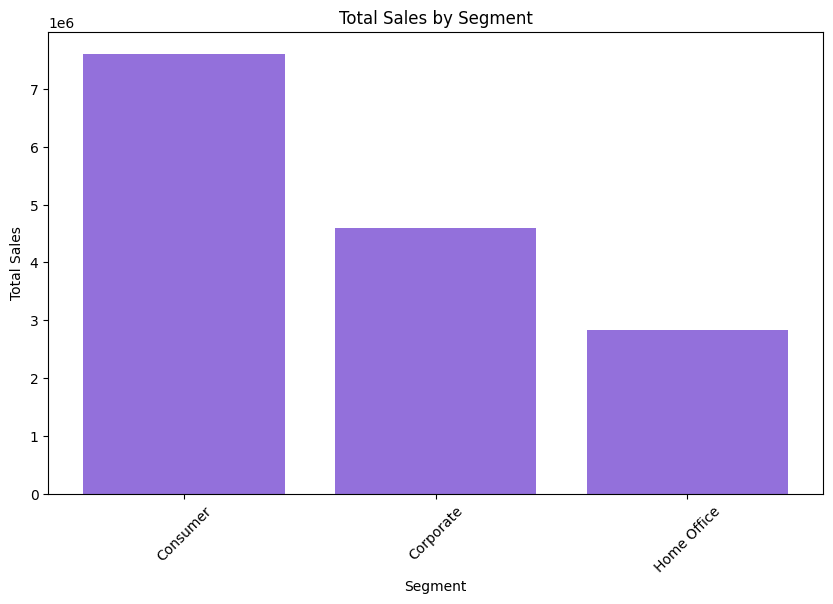

In [133]:
#TOTAL SALES BY SEGMENT
pd.options.display.float_format = '{:,.2f}'.format
#Group the data by segment and sum the sales
sales_by_segment = data.groupby('Segment')['Sales'].sum().reset_index()

# Sort by sales to see the top performers
sales_by_segment = sales_by_segment.sort_values(by='Sales', ascending=False)
print(sales_by_segment)
# Plotting total sales by segment
plt.figure(figsize=(10, 6))
plt.bar(sales_by_segment['Segment'], sales_by_segment['Sales'], color='mediumpurple')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Total Sales by Category (sorted 1):
          Category        Sales
2       Technology 5,488,559.00
0        Furniture 4,846,747.19
1  Office Supplies 4,705,548.43
15040854.629499998


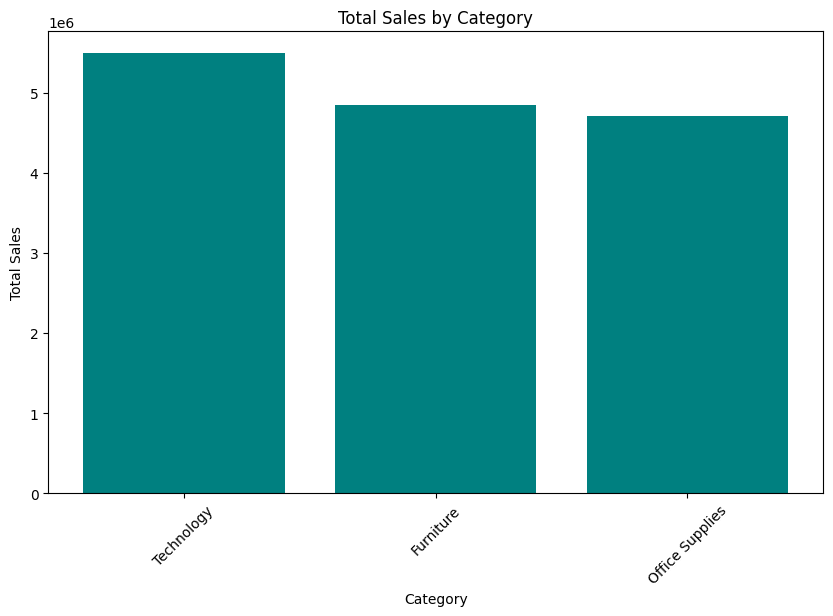

In [134]:
#TOTAL SALES BY CATEGORY
# Group the data by category and sum the sales
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
sales_sum = data['Sales'].sum()
# Sort by sales to see the top performers
sales_by_category = sales_by_category.sort_values(by='Sales', ascending=False)

print("\nTotal Sales by Category (sorted 1):")
print(sales_by_category)
print(sales_sum)

# Plotting total sales by category
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category['Category'], sales_by_category['Sales'], color='teal')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Total Sales by Sub-Category (sorted):
   Sub-Category        Sales
13       Phones 2,167,612.25
5        Chairs 2,143,282.37
14      Storage 1,473,811.66
16       Tables 1,355,416.74
3       Binders 1,316,924.69
11     Machines 1,259,685.37
0   Accessories 1,097,774.14
6       Copiers   963,487.24
4     Bookcases   748,159.62
1    Appliances   699,840.10
9   Furnishings   599,888.47
12        Paper   515,138.14
15     Supplies   312,244.41
2           Art   177,444.98
7     Envelopes   108,665.22
10       Labels    81,499.24
8     Fasteners    19,979.99


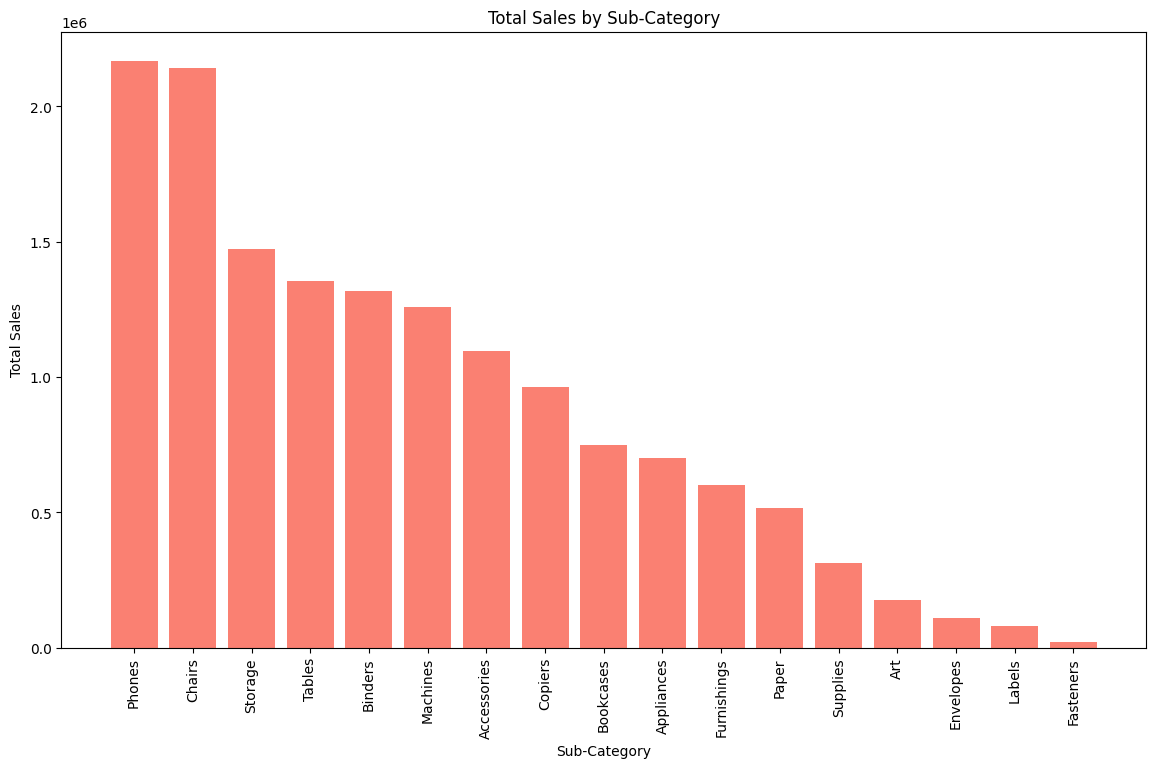

In [135]:
#TOTAL SALES BY SUB-CATEGORY
# Group the data by sub-category and sum the sales
sales_by_sub_category = data.groupby('Sub-Category')['Sales'].sum().reset_index()

#Sort by sales to see the top performers
sales_by_sub_category = sales_by_sub_category.sort_values(by='Sales', ascending=False)

print("\nTotal Sales by Sub-Category (sorted):")
print(sales_by_sub_category)

# Plotting total sales by sub-category
plt.figure(figsize=(14, 8))
plt.bar(sales_by_sub_category['Sub-Category'], sales_by_sub_category['Sales'], color='salmon')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


Total Sales by Ship Mode (sorted):
        Ship Mode        Sales
3  Standard Class 8,860,654.23
2    Second Class 3,018,292.06
0     First Class 2,311,172.88
1        Same Day   850,735.45


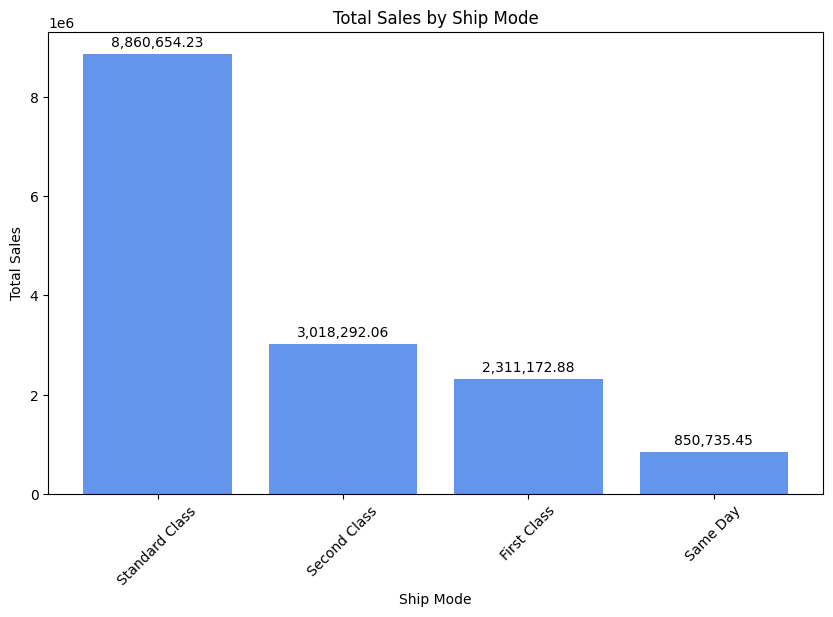

In [136]:
#TOTAL SALES BY SHIP MODE
# Group the data by ship mode and sum the sales
sales_by_ship_mode = data.groupby('Ship Mode')['Sales'].sum().reset_index()

#  Sort by sales to see the top performers
sales_by_ship_mode = sales_by_ship_mode.sort_values(by='Sales', ascending=False)

print("\nTotal Sales by Ship Mode (sorted):")
print(sales_by_ship_mode)

# Plotting total sales by ship mode
plt.figure(figsize=(10, 6))
# plt.bar(sales_by_ship_mode['Ship Mode'], sales_by_ship_mode['Sales'], color='cornflowerblue')
bars = plt.bar(sales_by_ship_mode['Ship Mode'], sales_by_ship_mode['Sales'], color='cornflowerblue')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
# Annotate bars with sales values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

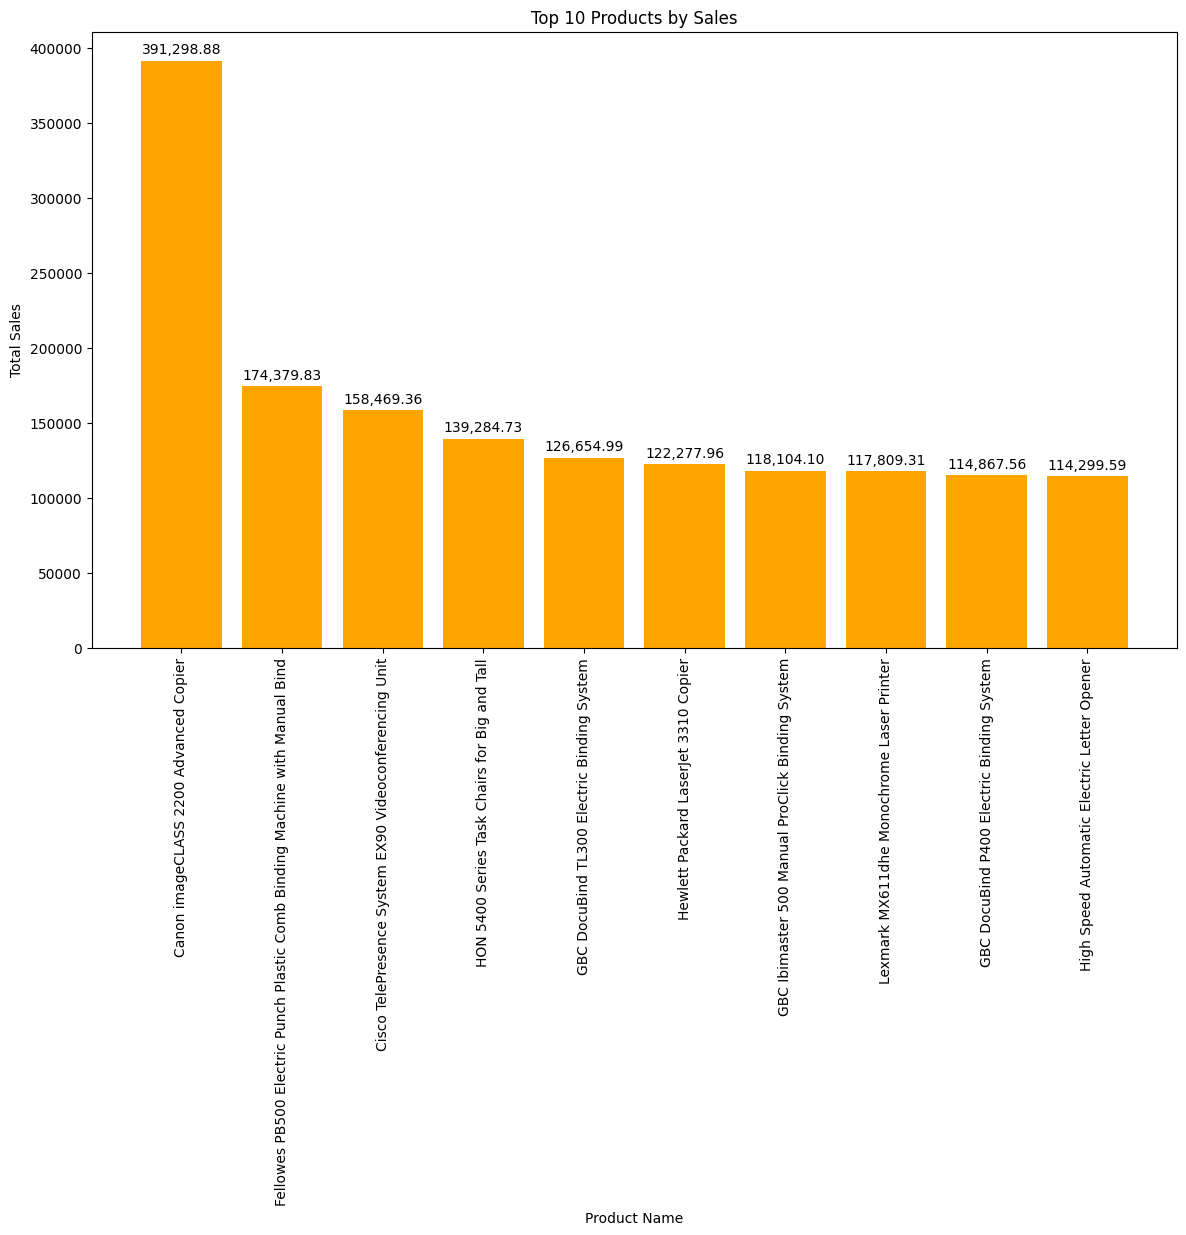

In [137]:
#TOP 1O PRODUCTS BY SALES
# Group the data by product and sum the sales
sales_by_product = data.groupby('Product Name')['Sales'].sum().reset_index()

# Sort by sales to find the top performers
top_products = sales_by_product.sort_values(by='Sales', ascending=False).head(10)

# Plotting top 10 products by sales
plt.figure(figsize=(14, 8))
bars = plt.bar(top_products['Product Name'], top_products['Sales'], color='orange')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
# Annotate bars with sales values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

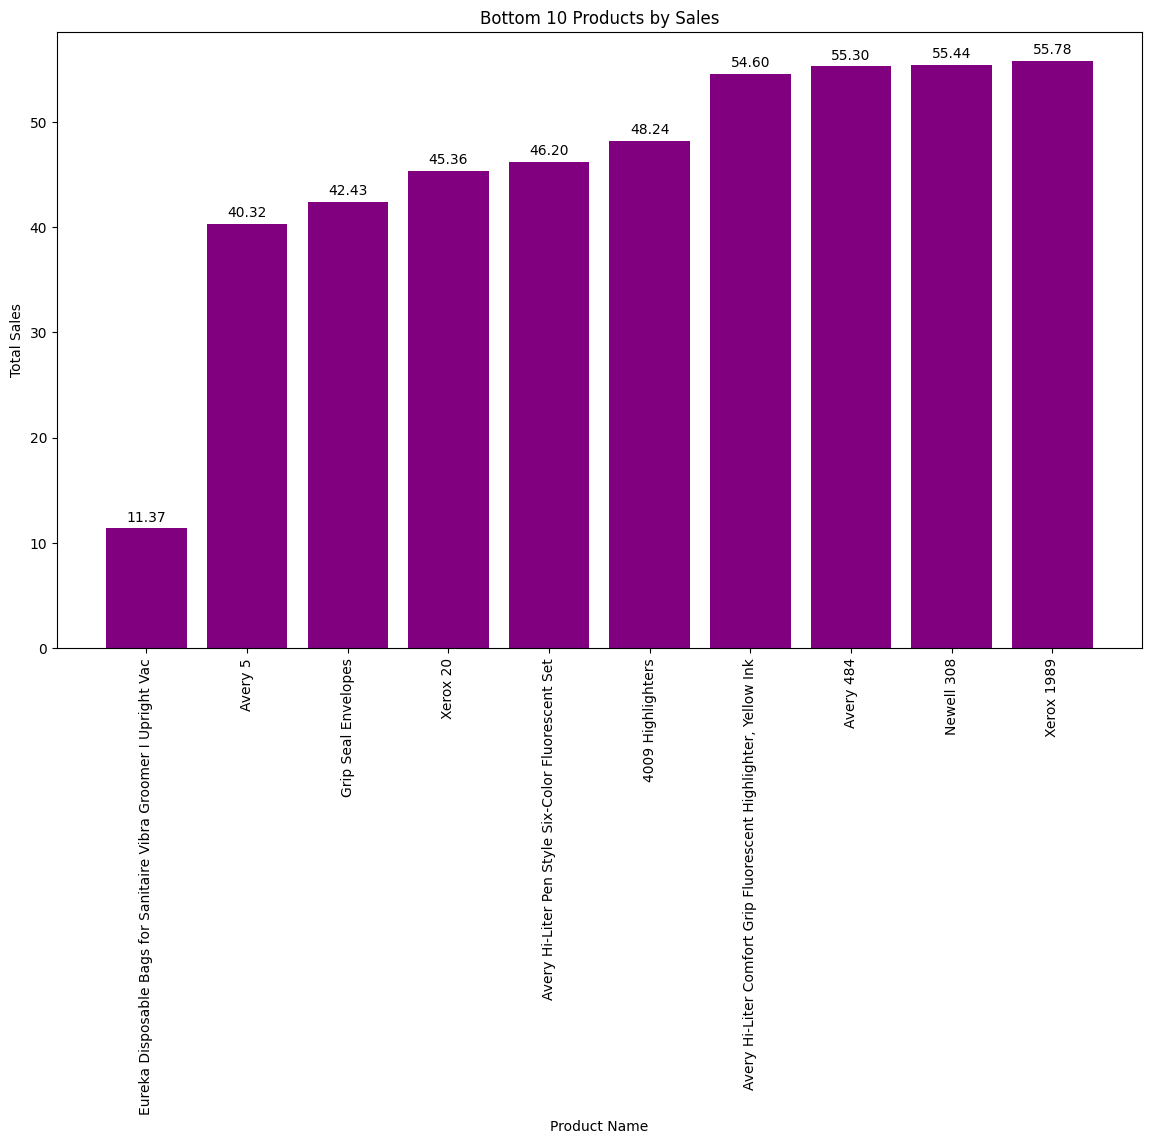

In [138]:
#Bottom 10 Products by Sales
bottom_products = sales_by_product.sort_values(by='Sales', ascending=True).head(10)
# print(bottom_products)
plt.figure(figsize=(14, 8))
bars = plt.bar(bottom_products['Product Name'], bottom_products['Sales'], color='purple')
plt.title('Bottom 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
# Annotate bars with sales values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

# Sales Forecasting

In [139]:
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings("ignore")

In [140]:
# # Set 'Order Date' as the index
# data.set_index('Order Date', inplace=True)

# # Aggregate sales by day, month, and year
# daily_sales = data['Sales'].resample('D').sum()
# monthly_sales = data['Sales'].resample('M').sum()
# yearly_sales = data['Sales'].resample('Y').sum()

# # Display first few entries to verify
# print(daily_sales.head())
# print(monthly_sales.head())
# print(yearly_sales.head())

In [141]:
# def forecast_sales(sales_data, order=(5, 1, 0), periods=30, freq='D'):
#     """
#     Fit an ARIMA model and forecast sales.

#     :param sales_data: Time series data of sales
#     :param order: ARIMA model order (p, d, q)
#     :param periods: Number of periods to forecast
#     :param freq: Frequency of forecast ('D' for daily, 'M' for monthly, 'Y' for yearly)
#     :return: Forecasted sales
#     """
#     # Fit the model
#     model = ARIMA(sales_data, order=order)
#     model_fit = model.fit()

#     # Forecast
#     forecast = model_fit.forecast(steps=periods)

#     # Create a DataFrame to hold forecast values
#     forecast_index = pd.date_range(start=sales_data.index[-1], periods=periods+1, freq=freq)[1:]
#     forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

#     return forecast_df


In [142]:
# # Forecast daily sales for the next 30 days
# daily_forecast = forecast_sales(daily_sales, periods=30, freq='D')
# print(daily_forecast)

# # Forecast monthly sales for the next 12 months
# monthly_forecast = forecast_sales(monthly_sales, periods=12, freq='M')
# print(monthly_forecast)

# # Forecast yearly sales for the next 5 years
# yearly_forecast = forecast_sales(yearly_sales, periods=5, freq='Y')
# print(yearly_forecast)


In [143]:
# def plot_forecast(original_data, forecast_data, title='Sales Forecast'):
#     """
#     Plot the original sales data and forecasted data.

#     :param original_data: Original sales data
#     :param forecast_data: Forecasted sales data
#     :param title: Title of the plot
#     """
#     plt.figure(figsize=(12, 6))
#     plt.plot(original_data, label='Original')
#     plt.plot(forecast_data, label='Forecast', color='red')
#     plt.title(title)
#     plt.xlabel('Date')
#     plt.ylabel('Sales')
#     plt.legend()
#     plt.show()

# # Plot daily sales forecast
# plot_forecast(daily_sales, daily_forecast, title='Daily Sales Forecast')

# # Plot monthly sales forecast
# plot_forecast(monthly_sales, monthly_forecast, title='Monthly Sales Forecast')

# # Plot yearly sales forecast
# plot_forecast(yearly_sales, yearly_forecast, title='Yearly Sales Forecast')


In [144]:
from prophet import Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqs7bl3y9/75yulxhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqs7bl3y9/wla9jnvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10698', 'data', 'file=/tmp/tmpqs7bl3y9/75yulxhy.json', 'init=/tmp/tmpqs7bl3y9/wla9jnvt.json', 'output', 'file=/tmp/tmpqs7bl3y9/prophet_modelpgcvno2h/prophet_model-20240709030121.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:01:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:01:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


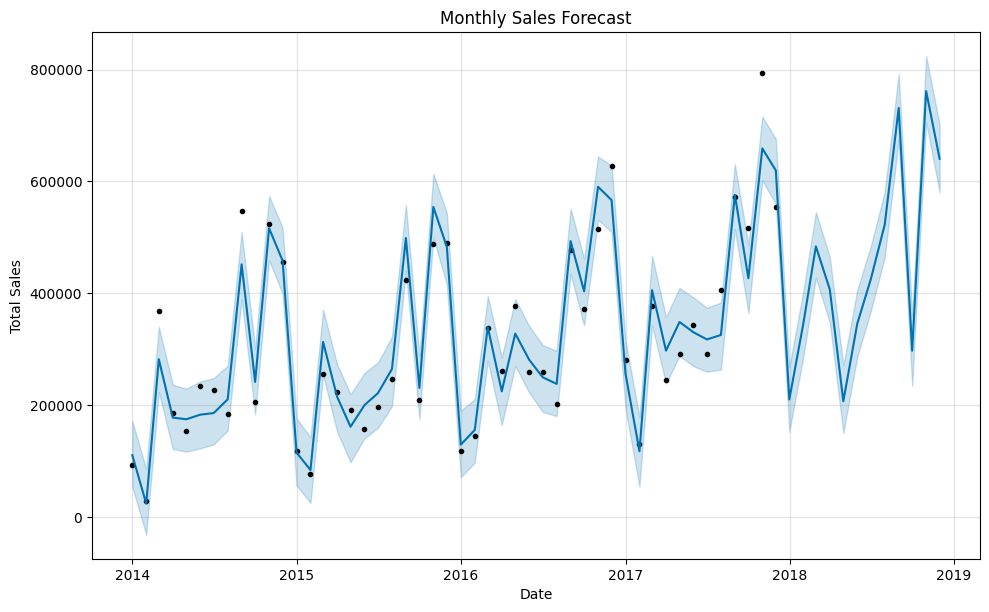

In [145]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
# Descriptive Analytics: Total sales per month
data['Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
# Convert 'Month' to a datetime format for Prophet
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Prepare data for Prophet
df = monthly_sales.rename(columns={'Month': 'ds', 'Sales': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

# Make future dataframe for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Predict future sales
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Plot forecast components
# fig2 = model.plot_components(forecast)
# plt.show()

# Descriptive Analytics: Profit


Profit by Region:
    Region     Profit
0  Central 251,118.54
1     East 598,697.18
2    South 307,671.46
3     West 703,013.49


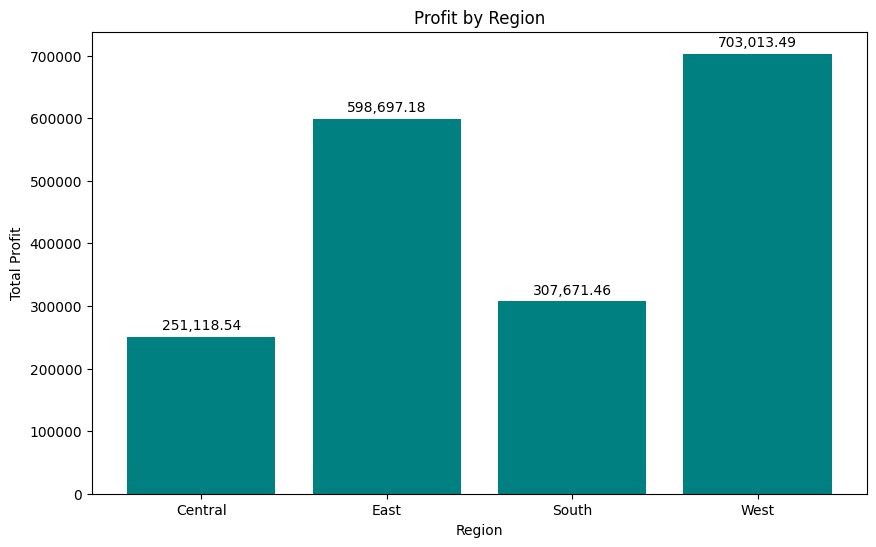

In [146]:
# PROFIT BY REGION
# Group by region and sum the profits
profit_by_region = data.groupby('Region')['Profit'].sum().reset_index()

# Display the results
print("\nProfit by Region:")
print(profit_by_region)

# Visualization (optional)
plt.figure(figsize=(10, 6))
bars = plt.bar(profit_by_region['Region'], profit_by_region['Profit'], color='teal')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')

# Annotate bars with profit values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


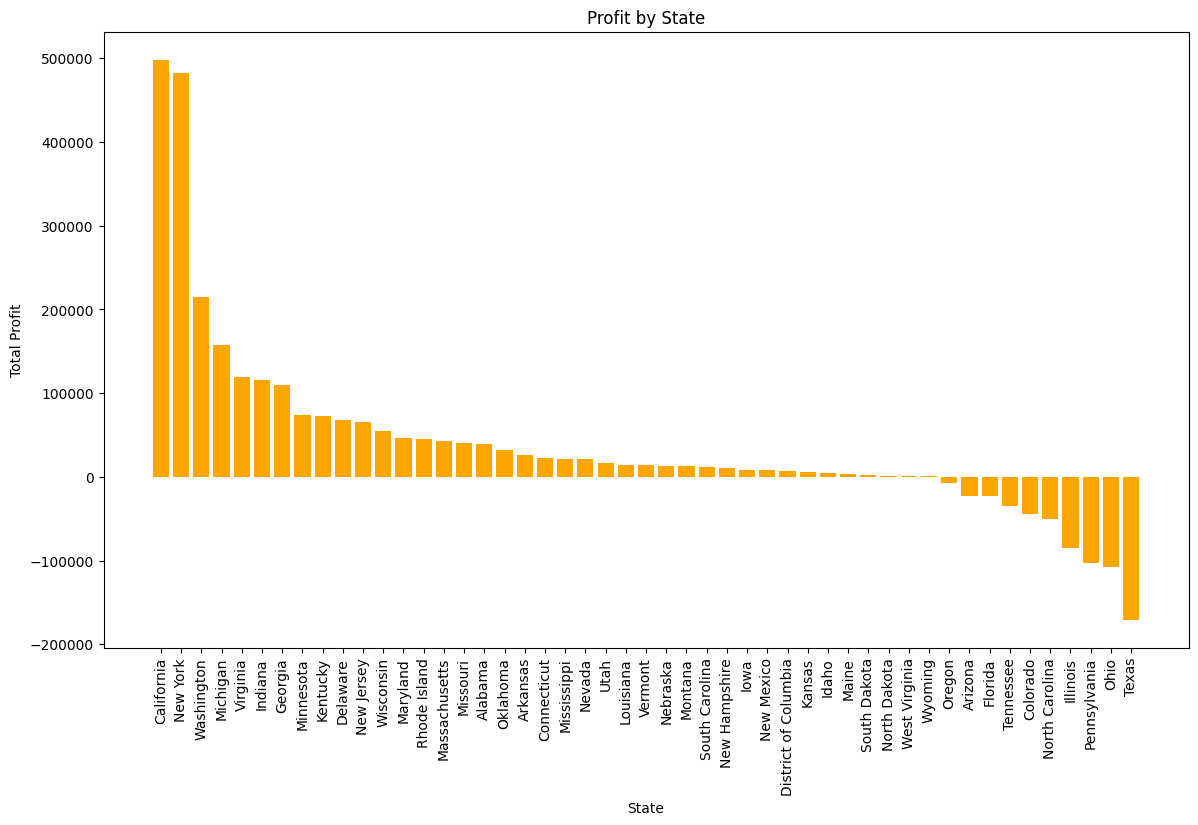

In [147]:
#PROFIT BY STATES
# Group by state and sum the profits
profit_by_state = data.groupby('State')['Profit'].sum().reset_index()

# Sort by profit to see the top and bottom performers
profit_by_state = profit_by_state.sort_values(by='Profit', ascending=False)

# Visualization
plt.figure(figsize=(14, 8))
bars = plt.bar(profit_by_state['State'], profit_by_state['Profit'], color='orange')
plt.title('Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

# Annotate bars with profit values
# for bar in bars:
#     height = bar.get_height()
#     plt.annotate(f'{height:,.2f}',
#                  xy=(bar.get_x() + bar.get_width() / 2, height),
#                  xytext=(0, 3),  # 3 points vertical offset
#                  textcoords="offset points",
#                  ha='center', va='bottom')

plt.show()


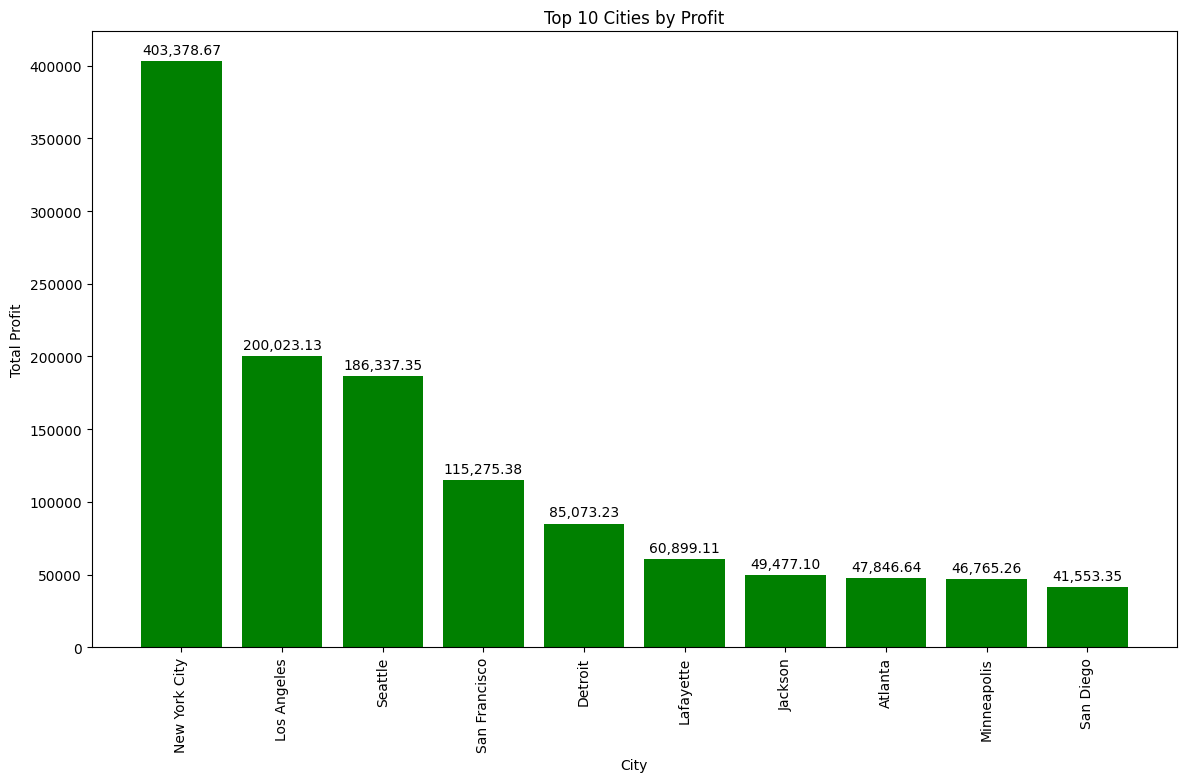

In [148]:
# TOP 10 CITIES BY PROFIT
# Group by city and sum the profits
profit_by_city = data.groupby('City')['Profit'].sum().reset_index()

# Sort by profit to find the top performers
top_profit_cities = profit_by_city.sort_values(by='Profit', ascending=False).head(10)

# Visualization
plt.figure(figsize=(14, 8))
bars = plt.bar(top_profit_cities['City'], top_profit_cities['Profit'], color='green')
plt.title('Top 10 Cities by Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

# Annotate bars with profit values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

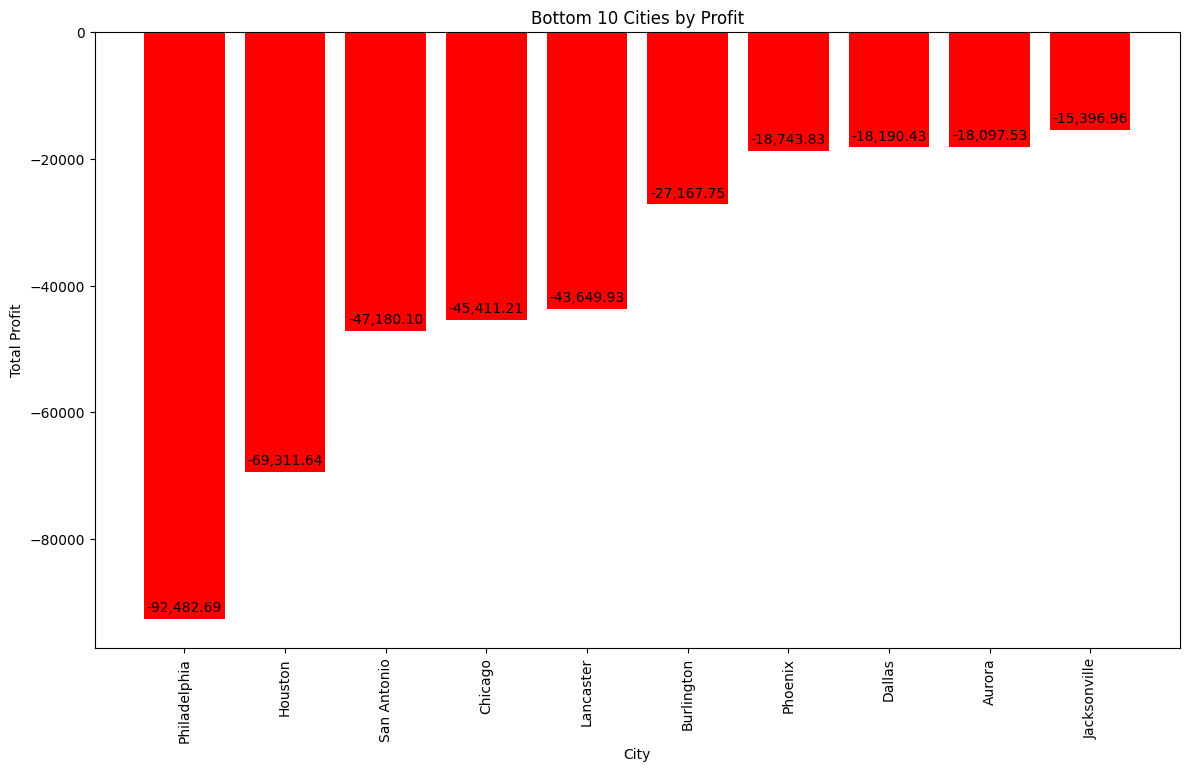

In [149]:
# Bottom 10 Cities by Profit
# Sort by profit to find the bottom performers
bottom_profit_cities = profit_by_city.sort_values(by='Profit', ascending=True).head(10)

#  Visualization
plt.figure(figsize=(14, 8))
bars = plt.bar(bottom_profit_cities['City'], bottom_profit_cities['Profit'], color='red')
plt.title('Bottom 10 Cities by Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

# Annotate bars with profit values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

Correlation between Sales and Profit: 0.47


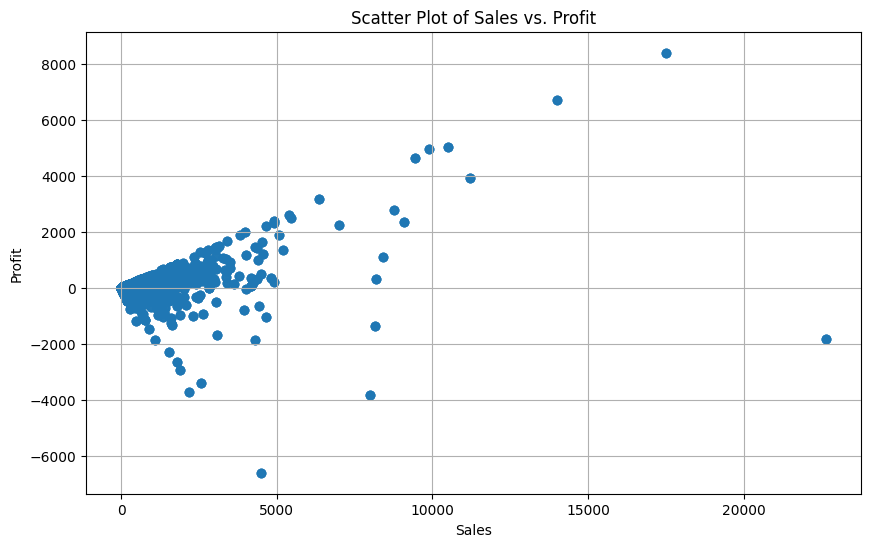

In [150]:
#CORRELATION BETWEEN SALES AND PROFIT
correlation = data['Sales'].corr(data['Profit'])
print(f"Correlation between Sales and Profit: {correlation:.2f}")

# Plot the relationship between profit and sales
plt.figure(figsize=(10, 6))
plt.scatter(data['Sales'], data['Profit'], alpha=0.5)
plt.title('Scatter Plot of Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

Correlation between total Sales and total Profit per order: 0.46


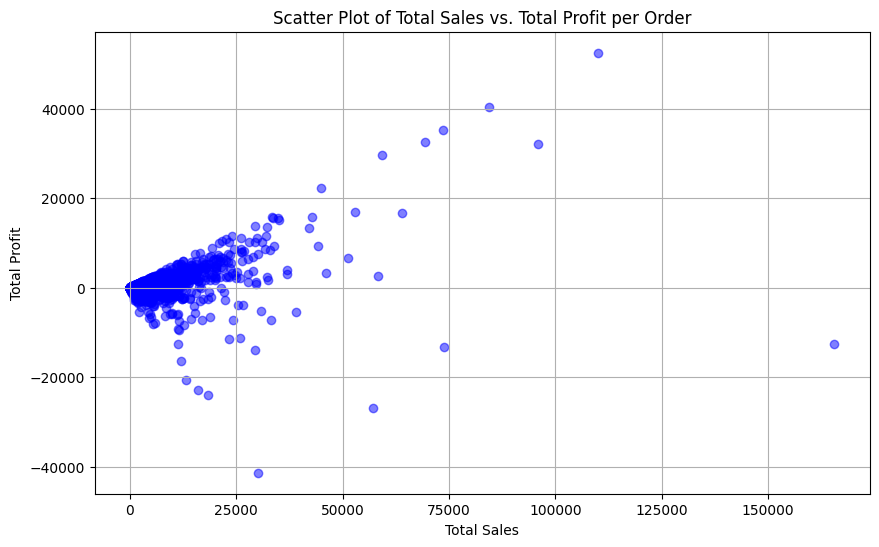

In [151]:
# Group by 'Order ID' and sum the sales and profit
grouped_data = data.groupby('Order ID').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Calculate the correlation between total sales and total profit per order
correlation = grouped_data['Sales'].corr(grouped_data['Profit'])
print(f"Correlation between total Sales and total Profit per order: {correlation:.2f}")

#  Plot the relationship between total sales and total profit per order
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Sales'], grouped_data['Profit'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Total Sales vs. Total Profit per Order')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

In [152]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order ID  5009 non-null   object 
 1   Sales     5009 non-null   float64
 2   Profit    5009 non-null   float64
dtypes: float64(2), object(1)
memory usage: 117.5+ KB


In [153]:
# # Ensure there are no missing values in relevant columns
# data = data.dropna(subset=['Sales', 'Profit', 'Discount'])

# # Correlation Analysis
# corr_discount_sales = data['Discount'].corr(df['Sales'])
# corr_discount_profit = data['Discount'].corr(df['Profit'])
# print(f"Correlation between Discount and Sales: {corr_discount_sales:.2f}")
# print(f"Correlation between Discount and Profit: {corr_discount_profit:.2f}")

# #  Visual Analysis
# plt.figure(figsize=(14, 6))

# # Discount vs Sales
# plt.subplot(1, 2, 1)
# plt.scatter(data['Discount'], data['Sales'], alpha=0.5, color='blue')
# plt.title('Discount vs Sales')
# plt.xlabel('Discount')
# plt.ylabel('Sales')
# plt.grid(True)

# # Discount vs Profit
# plt.subplot(1, 2, 2)
# plt.scatter(data['Discount'], data['Profit'], alpha=0.5, color='green')
# plt.title('Discount vs Profit')
# plt.xlabel('Discount')
# plt.ylabel('Profit')
# plt.grid(True)

# plt.tight_layout()
# plt.show()

# # Aggregate Analysis
# # Group by discount values and calculate average sales and profit
# grouped_data = data.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()
# print("\nAverage Sales and Profit by Discount Level:")
# print(grouped_data)

# # Plot the aggregate analysis
# fig, ax1 = plt.subplots(figsize=(10, 6))

# ax2 = ax1.twinx()
# ax1.bar(grouped_data['Discount'], grouped_data['Sales'], color='blue', alpha=0.6, label='Average Sales')
# ax2.plot(grouped_data['Discount'], grouped_data['Profit'], color='green', marker='o', label='Average Profit')

# ax1.set_xlabel('Discount Level')
# ax1.set_ylabel('Average Sales', color='blue')
# ax2.set_ylabel('Average Profit', color='green')
# ax1.set_title('Average Sales and Profit by Discount Level')

# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# plt.show()

# Customer Insights

In [154]:
# Data cleaning: Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Calculate RFM metrics
today = pd.to_datetime('now')
rfm_data = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (today - x.max()).days,  # Recency
    'Order ID': 'nunique',  # Frequency
    'Sales': 'sum'  # Monetary Value
}).reset_index()

# Rename columns
rfm_data.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# RFM scoring
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], q=4, labels=[4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], q=4, labels=[1, 2, 3, 4])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], q=4, labels=[1, 2, 3, 4])

# Calculate RFM segment
rfm_data['RFM_Segment'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Calculate RFM score
rfm_data['RFM_Score'] = rfm_data[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Print RFM segments
print(rfm_data[['Customer ID', 'RFM_Segment', 'RFM_Score']].head(15))

   Customer ID RFM_Segment  RFM_Score
0     AA-10315         114          6
1     AA-10375         441          9
2     AA-10480         112          4
3     AA-10645         324          9
4     AB-10015         111          3
5     AB-10060         334         10
6     AB-10105         344         11
7     AB-10150         311          5
8     AB-10165         431          8
9     AB-10255         241          7
10    AB-10600         312          6
11    AC-10420         111          3
12    AC-10450         434         11
13    AC-10615         413          8
14    AC-10660         111          3


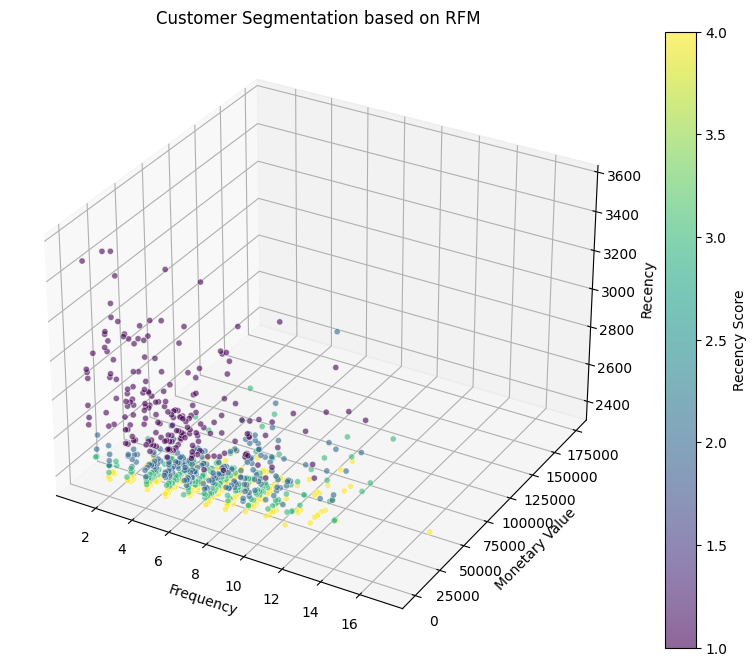

In [155]:
# Plotting customer segmentation on a 3D scatter diagram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(rfm_data['Frequency'], rfm_data['Monetary'], rfm_data['Recency'], c=rfm_data['R_Score'].astype(int), cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary Value')
ax.set_zlabel('Recency')

plt.colorbar(sc, label='Recency Score')
plt.title('Customer Segmentation based on RFM')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


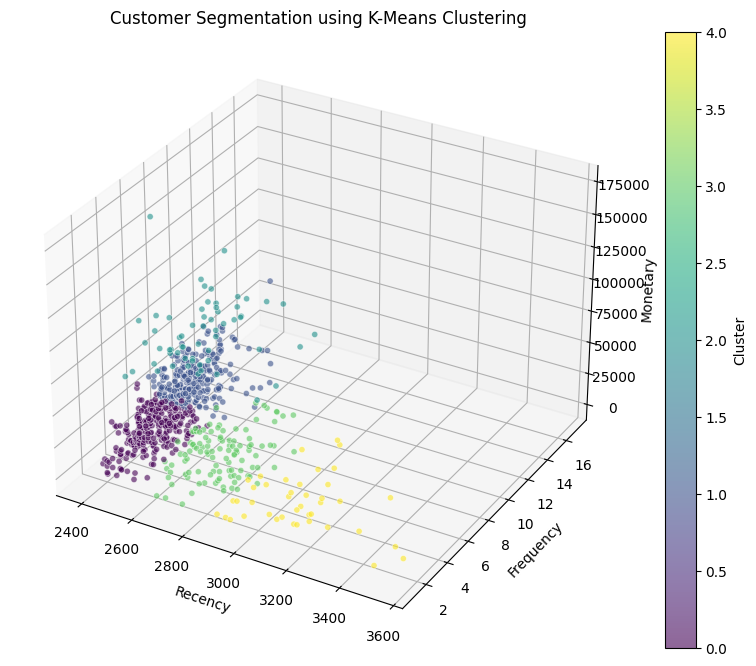

In [156]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data cleaning: Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Calculate RFM metrics
today = pd.to_datetime('now')
rfm_data = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (today - x.max()).days,  # Recency
    'Order ID': 'nunique',  # Frequency
    'Sales': 'sum'  # Monetary Value
}).reset_index()

# Rename columns
rfm_data.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Implement K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['Monetary'], c=rfm_data['Cluster'], cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.colorbar(sc, label='Cluster')
plt.title('Customer Segmentation using K-Means Clustering')
plt.show()


   Cluster  Avg Recency  Avg Frequency  Avg Monetary  Customer Count
0        0     2,454.56           4.85     11,320.68             300
1        1     2,449.00           8.59     22,296.83             282
2        2     2,503.22           8.38     63,597.49              60
3        3     2,737.65           4.63     10,390.36             110
4        4     3,117.39           2.93      9,711.16              41


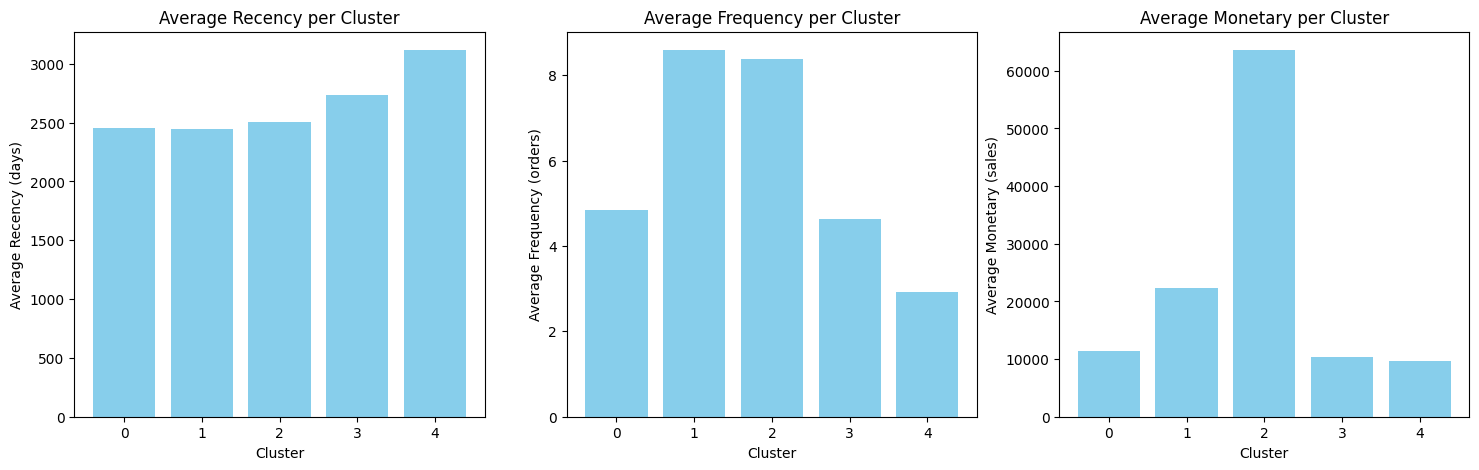

Cluster 0.0:
  - Number of Customers: 300.0
  - Average Recency (days): 2454.56
  - Average Frequency (orders): 4.85
  - Average Monetary (sales): $11320.68


Cluster 1.0:
  - Number of Customers: 282.0
  - Average Recency (days): 2449.00
  - Average Frequency (orders): 8.59
  - Average Monetary (sales): $22296.83


Cluster 2.0:
  - Number of Customers: 60.0
  - Average Recency (days): 2503.22
  - Average Frequency (orders): 8.38
  - Average Monetary (sales): $63597.49


Cluster 3.0:
  - Number of Customers: 110.0
  - Average Recency (days): 2737.65
  - Average Frequency (orders): 4.63
  - Average Monetary (sales): $10390.36


Cluster 4.0:
  - Number of Customers: 41.0
  - Average Recency (days): 3117.39
  - Average Frequency (orders): 2.93
  - Average Monetary (sales): $9711.16




In [160]:
# Calculate mean values of RFM metrics for each cluster
cluster_summary = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).reset_index()

# Rename columns for better understanding
cluster_summary.columns = ['Cluster', 'Avg Recency', 'Avg Frequency', 'Avg Monetary', 'Customer Count']

print(cluster_summary)

# Plotting the characteristics of each cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Avg Recency
axes[0].bar(cluster_summary['Cluster'], cluster_summary['Avg Recency'], color='skyblue')
axes[0].set_title('Average Recency per Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average Recency (days)')

# Plot Avg Frequency
axes[1].bar(cluster_summary['Cluster'], cluster_summary['Avg Frequency'], color='skyblue')
axes[1].set_title('Average Frequency per Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Average Frequency (orders)')

# Plot Avg Monetary
axes[2].bar(cluster_summary['Cluster'], cluster_summary['Avg Monetary'], color='skyblue')
axes[2].set_title('Average Monetary per Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Average Monetary (sales)')

plt.show()

# Interpretation
for i, row in cluster_summary.iterrows():
    print(f"Cluster {row['Cluster']}:")
    print(f"  - Number of Customers: {row['Customer Count']}")
    print(f"  - Average Recency (days): {row['Avg Recency']:.2f}")
    print(f"  - Average Frequency (orders): {row['Avg Frequency']:.2f}")
    print(f"  - Average Monetary (sales): ${row['Avg Monetary']:.2f}")
    print("\n")


In [158]:
# data['Order Date'] = pd.to_datetime(data['Order Date'])

# # Calculate RFM Metrics
# # Calculate Recency, Frequency, and Monetary Value for each customer
# current_date = data['Order Date'].max()  # Get the current date for recency calculation
# rfm_data = df.groupby('Customer ID').agg({
#     'Order Date': lambda x: (current_date - x.max()).days,  # Recency
#     'Sales': ['count', 'sum']  # Frequency and Monetary Value
# })
# rfm_data.columns = ['Recency', 'Frequency', 'Monetary']

# # Step 3: RFM Segmentation
# # Define quantiles for binning
# quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])

# # Create RFM segments based on quantiles
# def rfm_segment(x, metric, quantiles):
#     if x <= quantiles[metric][0.25]:
#         return 1
#     elif x <= quantiles[metric][0.5]:
#         return 2
#     elif x <= quantiles[metric][0.75]:
#         return 3
#     else:
#         return 4

# rfm_data['R'] = rfm_data['Recency'].apply(rfm_segment, args=('Recency', quantiles))
# rfm_data['F'] = rfm_data['Frequency'].apply(rfm_segment, args=('Frequency', quantiles))
# rfm_data['M'] = rfm_data['Monetary'].apply(rfm_segment, args=('Monetary', quantiles))

# # Combine RFM values to create RFM segments
# rfm_data['RFM Segment'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str) + rfm_data['M'].astype(str)

# # Assign labels to RFM segments
# segment_labels = {
#     '111': 'High Value',
#     '411': 'Loyal Customers',
#     '144': 'Big Spenders',
#     '444': 'Low Value',
#     '311': 'Frequent Buyers',
#     '311': 'Recent Customers',
#     '444': 'Churned Customers'
# }
# rfm_data['Segment'] = rfm_data['RFM Segment'].map(segment_labels)

# # Analysis and Visualization
# # Analyze segment characteristics
# segment_counts = rfm_data['Segment'].value_counts()

# # Plot segment distribution
# plt.figure(figsize=(10, 6))
# segment_counts.plot(kind='bar', color='skyblue')
# plt.title('RFM Segment Distribution')
# plt.xlabel('Segments')
# plt.ylabel('Number of Customers')
# plt.xticks(rotation=45)
# plt.show()

# # Display segment details
# print("RFM Segment Details:")
# print(rfm_data.groupby('Segment').agg({
#     'Recency': 'mean',
#     'Frequency': 'mean',
#     'Monetary': 'mean'
# }))

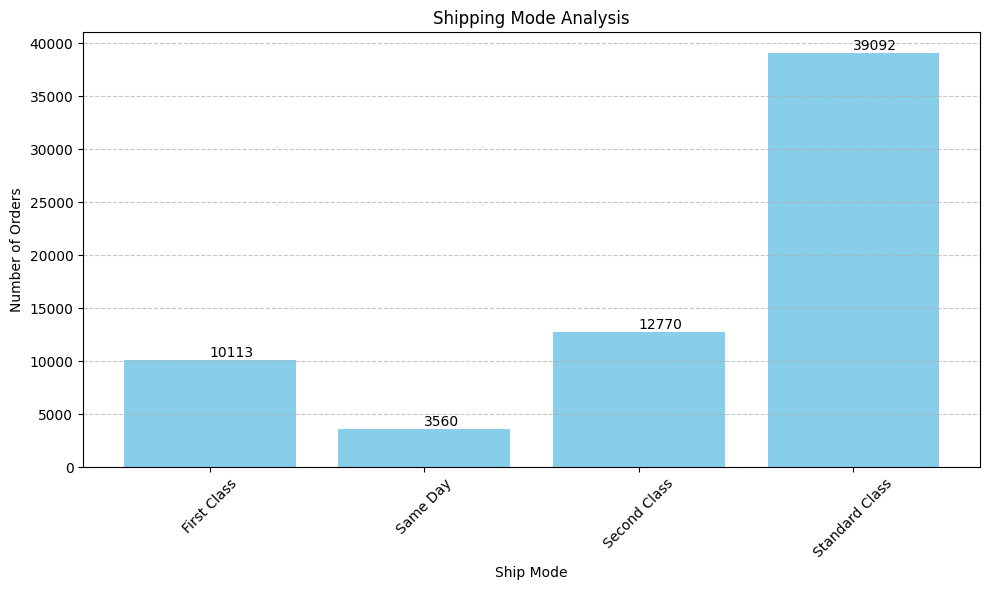

In [159]:
# Grouping by Ship Mode and counting the number of orders
shipping_mode_analysis = data.groupby('Ship Mode').size().reset_index(name='Number of Orders')

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(shipping_mode_analysis['Ship Mode'], shipping_mode_analysis['Number of Orders'], color='skyblue')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.title('Shipping Mode Analysis')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
plt.tight_layout()
plt.show()